In [125]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.utils.class_weight import compute_class_weight
from sklearn import preprocessing, metrics
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, label_binarize, StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

!pip install xgboost
!pip install imbalance-xgboost

In [5]:
cd C:\Users\CoreziDev\Downloads\archive

C:\Users\CoreziDev\Downloads\archive


In [103]:
data_train=pd.read_csv("churn-bigml-80.csv")
data_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [11]:
data_train.shape

(2666, 20)

#### The above results implies that there are 20 variables and 2666 examples to train our model. Our training data donot have any missing value.

In [104]:
data_test=pd.read_csv("churn-bigml-20.csv")
data_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


### EDA ON TRAINING DATA

In [13]:
data_train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

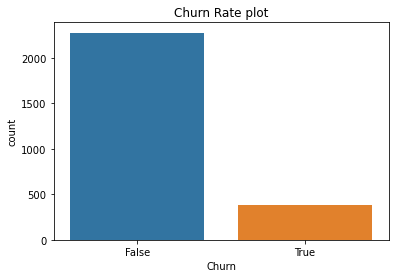

In [16]:
sns.countplot(data=data_train, x = "Churn")
plt.title("Churn Rate plot")
plt.show()

#### The above plot indicates that our data is imbalanced, since majority (False) customers donot churn from the existing company and we are interested with the minority class(True).

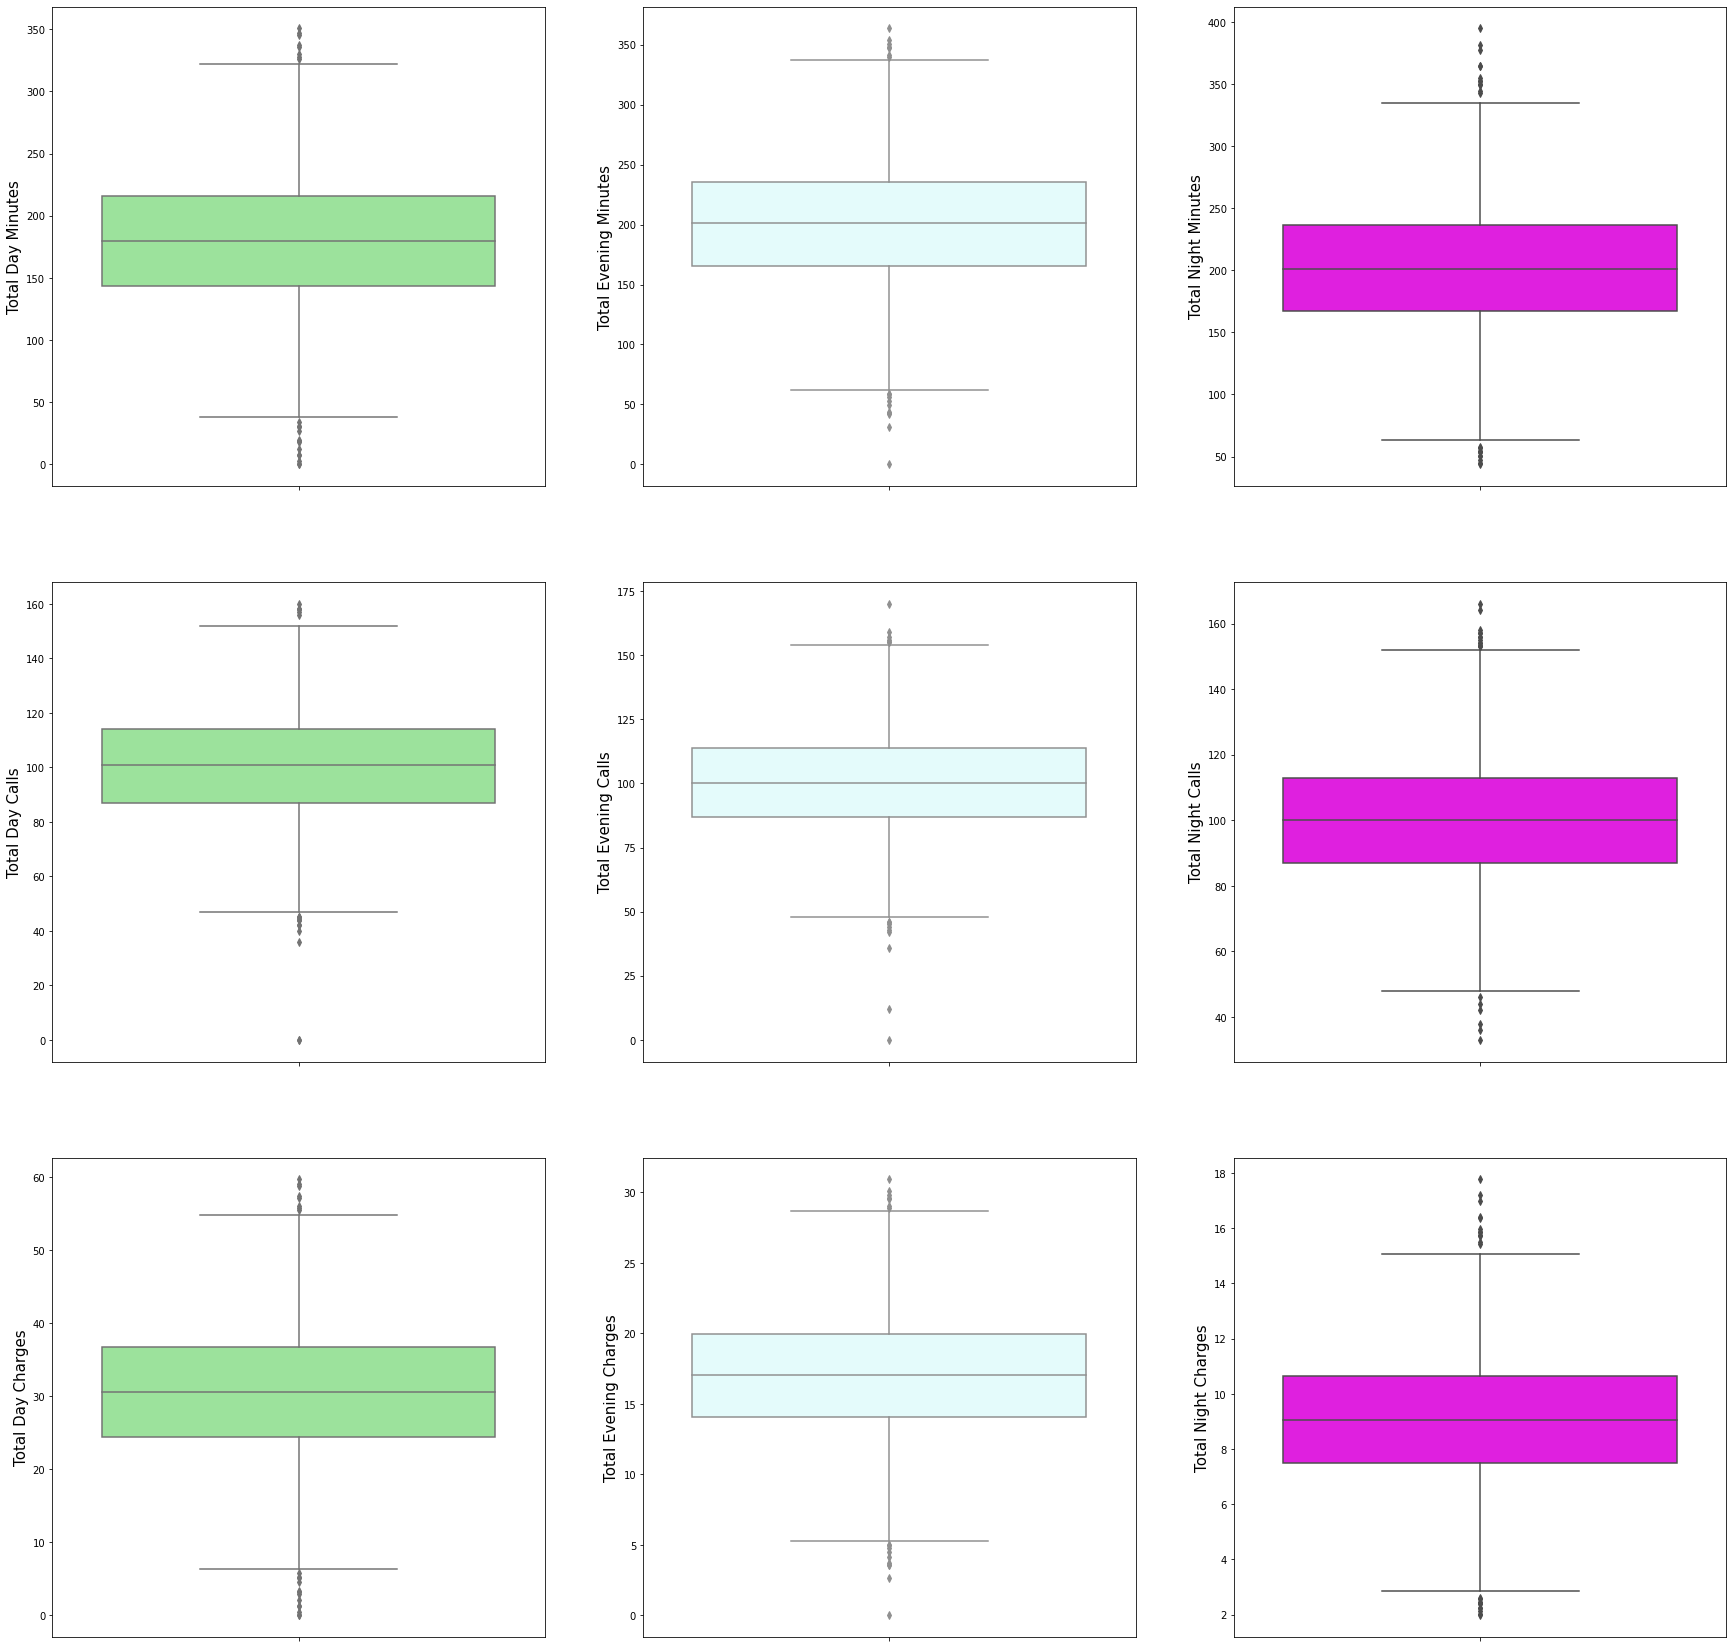

In [32]:
plt.figure(figsize=(30,30))
plt.yticks(fontsize=20)
plt.subplot(3,3,1)
sns.boxplot(data=data_train, y="Total day minutes", color= "lightgreen")
plt.ylabel("Total Day Minutes", fontsize = 15)
plt.subplot(3,3,2)
sns.boxplot(data=data_train, y="Total eve minutes", color= "lightcyan")
plt.ylabel("Total Evening Minutes", fontsize = 15)
plt.subplot(3,3,3)
sns.boxplot(data=data_train, y="Total night minutes", color= "magenta")
plt.ylabel("Total Night Minutes", fontsize = 15)
plt.subplot(3,3,4)
sns.boxplot(data=data_train, y="Total day calls", color= "lightgreen")
plt.ylabel("Total Day Calls", fontsize = 15)
plt.subplot(3,3,5)
sns.boxplot(data=data_train, y="Total eve calls", color= "lightcyan")
plt.ylabel("Total Evening Calls", fontsize = 15)
plt.subplot(3,3,6)
sns.boxplot(data=data_train, y="Total night calls", color= "magenta")
plt.ylabel("Total Night Calls", fontsize = 15)
plt.subplot(3,3,7)
sns.boxplot(data=data_train, y="Total day charge", color= "lightgreen")
plt.ylabel("Total Day Charges", fontsize = 15)
plt.subplot(3,3,8)
sns.boxplot(data=data_train, y="Total eve charge", color= "lightcyan")
plt.ylabel("Total Evening Charges", fontsize = 15)
plt.subplot(3,3,9)
sns.boxplot(data=data_train, y="Total night charge", color= "magenta")
plt.ylabel("Total Night Charges", fontsize = 15)
plt.show()

##### We can infer that maximum number of calls are made during day. Least calls are made during night.
##### Even though maximum number of calls are made during daytime, customers speak for longer duration during the evening as compared to night and day when it is least.
##### While comparing the boxplots for call charges, we can see that highest charges are incurred during daytime which is evident due to the highest number of calls.

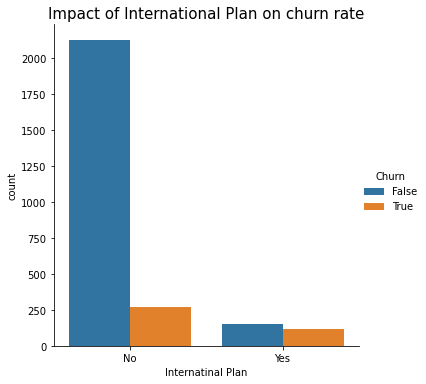

In [47]:
sns.catplot(data=data_train, x= "International plan" , kind= "count", hue="Churn")
plt.xlabel("Internatinal Plan")
plt.title("Impact of International Plan on churn rate", fontsize = 15)
plt.show()

##### Customers having International Plans are quite less as compared to those who dont have one. However, there is a higher possibilty amongst the customers with Internatinal Plan to leave the comapany as compared to those who donot have one.

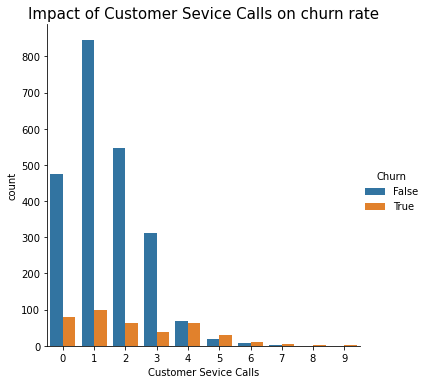

In [54]:
sns.catplot(data=data_train, x= "Customer service calls",kind = "count" ,hue ="Churn", ci = False)
plt.xlabel("Customer Sevice Calls")
plt.title("Impact of Customer Sevice Calls on churn rate", fontsize=15)
plt.show()

##### The above plot indicates that if a customer have to call the customer service centre multiple times (>3) then the tendency to churn from the company increses.

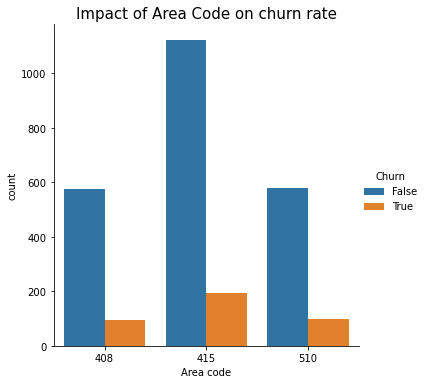

In [102]:
sns.catplot(data=data_train, x= "Area code",kind = "count" ,hue ="Churn", ci = False)
plt.xlabel("Area code")
plt.title("Impact of Area Code on churn rate", fontsize=15)
plt.show()

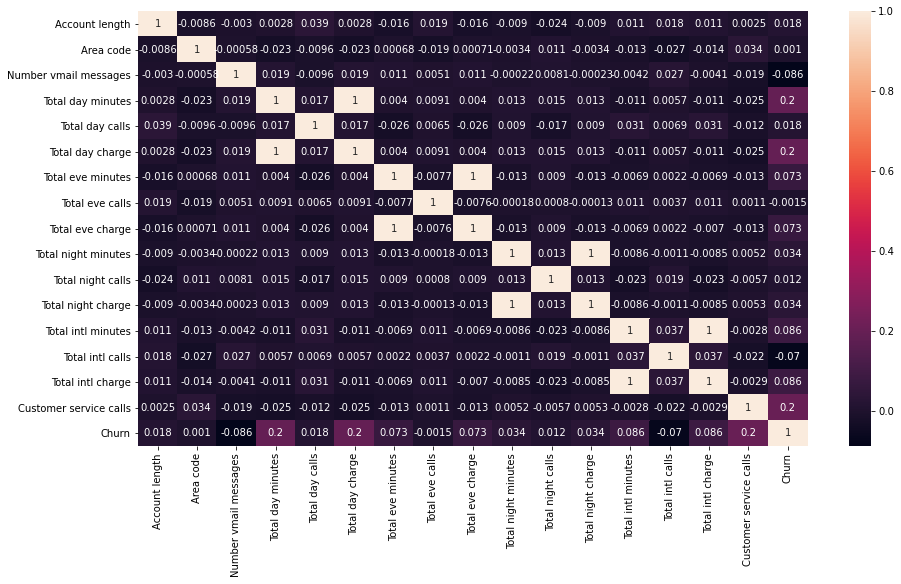

In [59]:
corr = data_train.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr, annot = True)
plt.show()

##### The above heatmap shows the following:
#####    There is a positive correlation (0.2) between Churn and total day minutes, total day charge, customer service calls.
#####    A perfect linear relationship exist between duration of calls and charges incurred for such aclls, which is obvious.
    

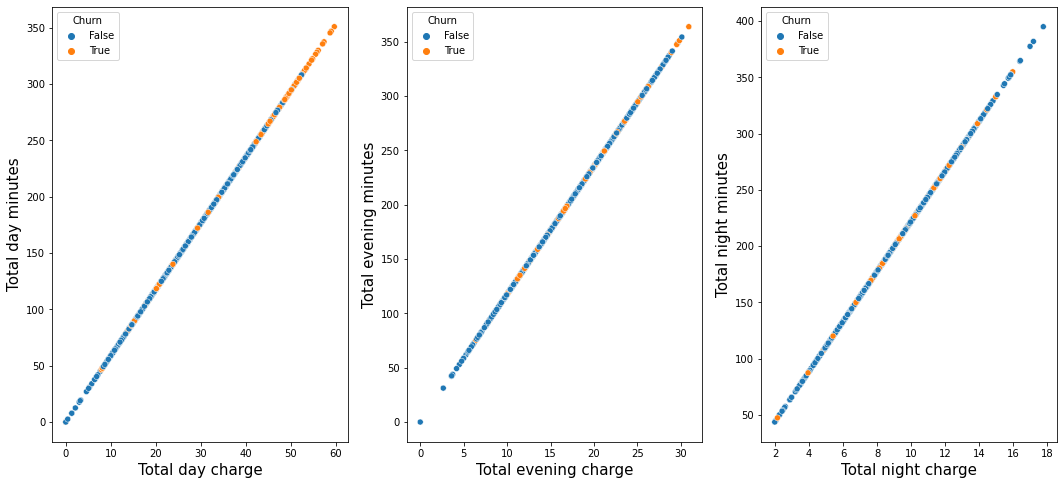

In [60]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.scatterplot(data=data_train , x = "Total day charge", y= "Total day minutes", hue = "Churn")
plt.xlabel("Total day charge", fontsize = 15)
plt.ylabel("Total day minutes", fontsize =15)
plt.subplot(1,3,2)
sns.scatterplot(data=data_train , x = "Total eve charge", y= "Total eve minutes", hue = "Churn")
plt.xlabel("Total evening charge", fontsize = 15)
plt.ylabel("Total evening minutes", fontsize =15)
plt.subplot(1,3,3)
sns.scatterplot(data=data_train , x = "Total night charge", y= "Total night minutes", hue = "Churn")
plt.xlabel("Total night charge", fontsize = 15)
plt.ylabel("Total night minutes", fontsize =15)
plt.show()

##### Customers making higher calls during day incurs higher charges and the churn rate amongst them is also quite high compared to others.

In [106]:
data_train['Churn'] = LabelEncoder().fit_transform(data_train['Churn'])
data_train["International plan"]= data_train["International plan"].replace(['Yes','No'],['1','0'])
data_train["Voice mail plan"]= data_train["Voice mail plan"].replace(['Yes','No'],['1','0'])
data_train['Area code'] = LabelEncoder().fit_transform(data_train['Area code'])

In [107]:
y_train = data_train['Churn']
data_train.drop(['Churn','State'],axis=1,inplace=True)
X_train = data_train
del data_train

In [108]:
X_train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [111]:
data_test['Churn'] = LabelEncoder().fit_transform(data_test['Churn'])
data_test["International plan"]= data_test["International plan"].replace(['Yes','No'],['1','0'])
data_test["Voice mail plan"]= data_test["Voice mail plan"].replace(['Yes','No'],['1','0'])
data_test['Area code'] = LabelEncoder().fit_transform(data_test['Area code'])

In [112]:
y_test = data_test['Churn']
data_test.drop(['Churn','State'],axis=1,inplace=True)
X_test = data_test
del data_test

In [113]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

#### Linear Discriminant Analysis

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
acc_scores_lda = []
roc_auc_scores_lda = []
precision_scores_lda = []
recall_scores_lda = []
f1_scores_lda = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  lda = LinearDiscriminantAnalysis()
  lda.fit(X_train, y_train)
  y_pred = lda.predict(X_test)
    
  acc_scores_lda.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_lda.append(roc_auc_score(y_test, y_pred))
  precision_scores_lda.append(precision_score(y_test, y_pred))
  recall_scores_lda.append(recall_score(y_test, y_pred))
  f1_scores_lda.append(f1_score(y_test, y_pred))
  
  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_lda)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_lda)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_lda)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_lda)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_lda)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_lda)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_lda)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_lda)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_lda)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_lda)}")


------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.859712230215

##### Quadratic Discriminant Analysis

In [115]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
acc_scores_qda = []
roc_auc_scores_qda = []
precision_scores_qda = []
recall_scores_qda = []
f1_scores_qda = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(X_train, y_train)
  y_pred = qda.predict(X_test)

  acc_scores_qda.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_qda.append(roc_auc_score(y_test, y_pred))
  precision_scores_qda.append(precision_score(y_test, y_pred))
  recall_scores_qda.append(recall_score(y_test, y_pred))
  f1_scores_qda.append(f1_score(y_test, y_pred))
  
  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_qda)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_qda)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_qda)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_qda)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_qda)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_qda)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_qda)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_qda)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_qda)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_qda)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.866566716641

#### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
acc_scores_lr = []
roc_auc_scores_lr = []
precision_scores_lr = []
recall_scores_lr = []
f1_scores_lr = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model = LogisticRegression()
  result = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
    
  acc_scores_lr.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_lr.append(roc_auc_score(y_test, y_pred))
  precision_scores_lr.append(precision_score(y_test, y_pred))
  recall_scores_lr.append(recall_score(y_test, y_pred))
  f1_scores_lr.append(f1_score(y_test, y_pred))
  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_lr)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_lr)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_lr)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_lr)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_lr)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_lr)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_lr)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_lr)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_lr)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_lr)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.847076461769

#### Weighted Logistic Regression

In [155]:
# define class weights
w = {1:85.4, 0:14.6}

# define model
lg2 = LogisticRegression(random_state=13, class_weight=w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.6882494004796164
ROC AUC: 0.6989507667473771
Recall score: 0.7142857142857143


In [118]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }
# define model
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X,y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.7656403940886699 with param: {'class_weight': {0: 0.01, 1: 1.0}}


In [156]:
# define class weights
w = {0: 0.01, 1: 1.0}
acc_scores_wlr = []
roc_auc_scores_wlr = []
precision_scores_wlr = []
recall_scores_wlr = []
f1_scores_wlr = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  lg4 = LogisticRegression(random_state=13, class_weight=w)
  lg4.fit(X_train,y_train)
  y_pred = lg4.predict(X_test)

  acc_scores_wlr.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_wlr.append(roc_auc_score(y_test, y_pred))
  precision_scores_wlr.append(precision_score(y_test, y_pred))
  recall_scores_wlr.append(recall_score(y_test, y_pred))
  f1_scores_wlr.append(f1_score(y_test, y_pred))
  

  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_wlr)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_wlr)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_wlr)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_wlr)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_wlr)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_wlr)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_wlr)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_wlr)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_wlr)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_wlr)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.153477218225

#### KNN Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

acc_scores_knn = []
roc_auc_scores_knn = []
precision_scores_knn = []
recall_scores_knn = []
f1_scores_knn = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  acc_scores_knn.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_knn.append(roc_auc_score(y_test, y_pred))
  precision_scores_knn.append(precision_score(y_test, y_pred))
  recall_scores_knn.append(recall_score(y_test, y_pred))
  f1_scores_knn.append(f1_score(y_test, y_pred))

  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_knn)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_knn)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_knn)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_knn)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_knn)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_knn)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_knn)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_knn)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_knn)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_knn)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.890554722638

#### Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier

acc_scores_dt = []
roc_auc_scores_dt = []
precision_scores_dt = []
recall_scores_dt = []
f1_scores_dt = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  class_weights = {
    0: compute_class_weight('balanced', np.unique(y.iloc[train]), y.iloc[train])[0],
    1: compute_class_weight('balanced', np.unique(y.iloc[train]), y.iloc[train])[1]
  }

  dtClassifier = DecisionTreeClassifier(max_depth=20, class_weight=class_weights, random_state=0)
  dtClassifier.fit(X_train, y_train)
  y_pred = dtClassifier.predict(X_test)

  acc_scores_dt.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_dt.append(roc_auc_score(y_test, y_pred))
  precision_scores_dt.append(precision_score(y_test, y_pred))
  recall_scores_dt.append(recall_score(y_test, y_pred))
  f1_scores_dt.append(f1_score(y_test, y_pred))
  

  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_dt)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_dt)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_dt)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_dt)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_dt)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_dt)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_dt)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_dt)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_dt)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_dt)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.911694152923

#### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

acc_scores_rf = []
roc_auc_scores_rf = []
precision_scores_rf = []
recall_scores_rf = []
f1_scores_rf = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  class_weights = {
    0: compute_class_weight('balanced', np.unique(y.iloc[train]), y.iloc[train])[0],
    1: compute_class_weight('balanced', np.unique(y.iloc[train]), y.iloc[train])[1]
  }

  rfClassifier = RandomForestClassifier(max_depth=20, class_weight=class_weights, random_state=0)
  rfClassifier.fit(X_train, y_train)
  y_pred = rfClassifier.predict(X_test)

  acc_scores_rf.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_rf.append(roc_auc_score(y_test, y_pred))
  precision_scores_rf.append(precision_score(y_test, y_pred))
  recall_scores_rf.append(recall_score(y_test, y_pred))
  f1_scores_rf.append(f1_score(y_test, y_pred))
  

  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_rf)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_rf)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_rf)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_rf)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_rf)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_rf)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_rf)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_rf)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_rf)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_rf)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.959070464767

#### Imbalaced XG Boost

In [133]:
from imxgboost.imbalance_xgb import imbalance_xgboost as ixgb

acc_scores_ixgb = []
roc_auc_scores_ixgb = []
precision_scores_ixgb = []
recall_scores_ixgb = []
f1_scores_ixgb = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    ixgbc = ixgb()
    ixgbc.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = ixgbc.predict_determine(X_test.to_numpy(), y=None)

    acc_scores_ixgb.append(accuracy_score(y_test, y_pred))
    roc_auc_scores_ixgb.append(roc_auc_score(y_test, y_pred))
    precision_scores_ixgb.append(precision_score(y_test, y_pred))
    recall_scores_ixgb.append(recall_score(y_test, y_pred))
    f1_scores_ixgb.append(f1_score(y_test, y_pred))
    
    # Increase fold number
    fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_ixgb)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_ixgb)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_ixgb)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_ixgb)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_ixgb)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_ixgb)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_ixgb)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_ixgb)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_ixgb)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_ixgb)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.955322338830

#### MLP Classifier

In [136]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [138]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
acc_scores_mlp = []
roc_auc_scores_mlp = []
precision_scores_mlp = []
recall_scores_mlp = []
f1_scores_mlp = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')


  #Initializing the MLPClassifier
  classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
  #Fitting the training data to the network
  classifier.fit(X_train, y_train)
  #Predicting y for X_val
  y_pred = classifier.predict(X_test)

  acc_scores_mlp.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_mlp.append(roc_auc_score(y_test, y_pred))
  precision_scores_mlp.append(precision_score(y_test, y_pred))
  recall_scores_mlp.append(recall_score(y_test, y_pred))
  f1_scores_mlp.append(f1_score(y_test, y_pred))

  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_mlp)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_mlp)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_mlp)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_mlp)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_mlp)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_mlp)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_mlp)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_mlp)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_mlp)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_mlp)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.794602698650

[[460  25]
 [112  70]]


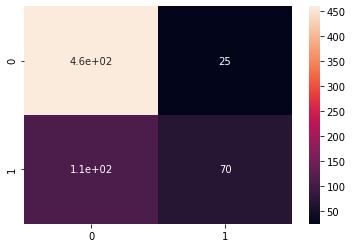

In [139]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True);

In [140]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       485
           1       0.74      0.38      0.51       182

    accuracy                           0.79       667
   macro avg       0.77      0.67      0.69       667
weighted avg       0.79      0.79      0.77       667



#### Ada Boost Classifier

In [142]:
from sklearn.ensemble import AdaBoostClassifier

acc_scores_ab = []
roc_auc_scores_ab = []
precision_scores_ab = []
recall_scores_ab = []
f1_scores_ab = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  adaBoostClassifier = AdaBoostClassifier(n_estimators=20, 
                                        random_state=0)

  adaBoostClassifier.fit(X_train, y_train)
  y_pred = adaBoostClassifier.predict(X_test)

  acc_scores_ab.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_ab.append(roc_auc_score(y_test, y_pred))
  precision_scores_ab.append(precision_score(y_test, y_pred))
  recall_scores_ab.append(recall_score(y_test, y_pred))
  f1_scores_ab.append(f1_score(y_test, y_pred))
  
  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_ab)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_ab)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_ab)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_ab)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_ab)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_ab)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_ab)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_ab)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_ab)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_ab)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.899550224887

#### Naive Bayes Classifier

In [145]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()

acc_scores_nb = []
roc_auc_scores_nb = []
precision_scores_nb = []
recall_scores_nb = []
f1_scores_nb = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc_scores_nb.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_nb.append(roc_auc_score(y_test, y_pred))
  precision_scores_nb.append(precision_score(y_test, y_pred))
  recall_scores_nb.append(recall_score(y_test, y_pred))
  f1_scores_nb.append(f1_score(y_test, y_pred))
  
  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_nb)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_nb)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_nb)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_nb)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_nb)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_nb)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_nb)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_nb)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_nb)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_nb)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.568215892053

In [147]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

acc_scores_nb = []
roc_auc_scores_nb = []
precision_scores_nb = []
recall_scores_nb = []
f1_scores_nb = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc_scores_nb.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_nb.append(roc_auc_score(y_test, y_pred))
  precision_scores_nb.append(precision_score(y_test, y_pred))
  recall_scores_nb.append(recall_score(y_test, y_pred))
  f1_scores_nb.append(f1_score(y_test, y_pred))
  
  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_nb)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_nb)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_nb)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_nb)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_nb)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_nb)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_nb)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_nb)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_nb)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_nb)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.863568215892

In [148]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

acc_scores_nb = []
roc_auc_scores_nb = []
precision_scores_nb = []
recall_scores_nb = []
f1_scores_nb = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc_scores_nb.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_nb.append(roc_auc_score(y_test, y_pred))
  precision_scores_nb.append(precision_score(y_test, y_pred))
  recall_scores_nb.append(recall_score(y_test, y_pred))
  f1_scores_nb.append(f1_score(y_test, y_pred))
  
  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_nb)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_nb)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_nb)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_nb)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_nb)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_nb)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_nb)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_nb)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_nb)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_nb)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.635682158920

#### SVM

In [149]:
from sklearn import svm

acc_scores_svm = []
roc_auc_scores_svm = []
precision_scores_svm = []
recall_scores_svm = []
f1_scores_svm = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  class_weights = {
    0: compute_class_weight('balanced', np.unique(y.iloc[train]), y.iloc[train])[0],
    1: compute_class_weight('balanced', np.unique(y.iloc[train]), y.iloc[train])[1]
  }

  supportVectorClassifier = svm.SVC(kernel='rbf', 
                                    class_weight=class_weights)

  supportVectorClassifier.fit(X_train, y_train)
  y_pred = supportVectorClassifier.predict(X_test)
  
  acc_scores_svm.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_svm.append(roc_auc_score(y_test, y_pred))
  precision_scores_svm.append(precision_score(y_test, y_pred))
  recall_scores_svm.append(recall_score(y_test, y_pred))
  f1_scores_svm.append(f1_score(y_test, y_pred))

  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_svm)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_svm)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_svm)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_svm)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_svm)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_svm)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_svm)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_svm)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_svm)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_svm)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.842578710644

#### Weighted SVM

In [152]:
from sklearn import svm
# define class weights
w = {0:85.4, 1:14.6}
acc_scores_wsvm = []
roc_auc_scores_wsvm = []
precision_scores_wsvm = []
recall_scores_wsvm = []
f1_scores_wsvm = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model = svm.SVC(kernel='rbf', class_weight= w)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc_scores_wsvm.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_wsvm.append(roc_auc_score(y_test, y_pred))
  precision_scores_wsvm.append(precision_score(y_test, y_pred))
  recall_scores_wsvm.append(recall_score(y_test, y_pred))
  f1_scores_wsvm.append(f1_score(y_test, y_pred))
  

  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_wsvm)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_wsvm)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_wsvm)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_wsvm)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_wsvm)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_wsvm)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_wsvm)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_wsvm)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_wsvm)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_wsvm)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.866566716641

In [153]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
# define model
from sklearn.svm import SVC
model = SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.786048 using {'class_weight': {0: 10, 1: 1}}
0.779509 (0.055291) with: {'class_weight': {0: 100, 1: 1}}
0.786048 (0.055266) with: {'class_weight': {0: 10, 1: 1}}
0.737417 (0.057137) with: {'class_weight': {0: 1, 1: 1}}
0.710865 (0.059564) with: {'class_weight': {0: 1, 1: 10}}
0.758721 (0.051721) with: {'class_weight': {0: 1, 1: 100}}


In [154]:
# define class weights
w = {0: 10, 1: 1}
acc_scores_wsvm = []
roc_auc_scores_wsvm = []
precision_scores_wsvm = []
recall_scores_wsvm = []
f1_scores_wsvm = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model = svm.SVC(kernel='rbf', class_weight= w)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc_scores_wsvm.append(accuracy_score(y_test, y_pred))
  roc_auc_scores_wsvm.append(roc_auc_score(y_test, y_pred))
  precision_scores_wsvm.append(precision_score(y_test, y_pred))
  recall_scores_wsvm.append(recall_score(y_test, y_pred))
  f1_scores_wsvm.append(f1_score(y_test, y_pred))
  

  # Increase fold number
  fold_no = fold_no + 1

print(f"Accuracy Mean: {np.mean(acc_scores_wsvm)}")
print(f"Accuracy Standard Deviation: {np.std(acc_scores_wsvm)}")
print("\n")
print(f"ROC-AUC Mean: {np.mean(roc_auc_scores_wsvm)}")
print(f"ROC-AUC Standard Deviation: {np.std(roc_auc_scores_wsvm)}")
print("\n")
print(f"Precision Mean: {np.mean(precision_scores_wsvm)}")
print(f"Precision Standard Deviation: {np.std(precision_scores_wsvm)}")
print("\n")
print(f"Recall Mean: {np.mean(recall_scores_wsvm)}")
print(f"Recall Standard Deviation: {np.std(recall_scores_wsvm)}")
print("\n")
print(f"F1 Mean: {np.mean(f1_scores_wsvm)}")
print(f"F1 Standard Deviation: {np.std(f1_scores_wsvm)}")

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Mean: 0.848920863309